In [1]:
import pandas as pd
import starrydata as sd

In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
sd_dataset = sd.load_dataset(zip_path="/Users/matotomoya/Downloads/starrydata_dataset (3).zip")
df_sample = pd.read_csv(sd_dataset.samples_csv)
df_paper = pd.read_csv(sd_dataset.papers_csv)
df = pd.merge(df_paper, df_sample, on="SID").reset_index(drop=True)
df

2024-07-05 17:35:14,541 - INFO - Loading ZIP file from local path: /Users/matotomoya/Downloads/starrydata_dataset (3).zip
2024-07-05 17:35:14,552 - INFO - Local ZIP file loaded into memory.


Dataset timestamp: 2024-07-04 12:00:02 UTC+0900 (JST)


,SID,DOI_x,URL,issued,author,title,container_title,container_title_short,volume,issue,...,project_names,created_at_x,sample_name,sample_id,composition,composition_details,DOI_y,created_at_y,updated_at,sample_info
0,1,10.1021/ar400290f,http://dx.doi.org/10.1021/ar400290f,"{""date_parts"":[[2014,4,15]]}","[{""affiliation"":[],""given"":""Chong"",""family"":""X...","""Decoupling Interrelated Parameters for Design...","""Accounts of Chemical Research""","""Acc. Chem. Res.""",47,4,...,"[""ThermoelectricMaterials"",""GeneralDB""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),Pb1Te1.01Na0.02,6027,Pb1Te1.01Na0.02,NaN,10.1021/ar400290f,Thu Aug 09 2018 16:48:52 GMT+0900 (JST),Thu Aug 09 2018 16:48:52 GMT+0900 (JST),"{"" remanence magnetion"":{""category"":"""",""commen..."
1,2,10.1021/am100654p,http://dx.doi.org/10.1021/am100654p,"{""date_parts"":[[2010,11,24]]}","[{""affiliation"":[],""given"":""B."",""family"":""Zhan...","""Promising Thermoelectric Properties of Commer...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""","""2""","""11""",...,"[""ThermoelectricMaterials""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),PH1000,16786,PH1000 with DMSO (dimethyl sulfoxide) doping a...,Bi2Te3 ball milled powders into these PEDOT:PS...,10.1021/am100654p,Wed May 29 2019 14:44:35 GMT+0900 (JST),Wed May 29 2019 14:44:35 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":""""},""Gr..."
2,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),as-synthesized,535,Bi2Te3,NaN,10.1021/am3002764,Fri Dec 01 2017 11:58:37 GMT+0900 (JST),Fri Dec 01 2017 11:58:37 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
3,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),heat-treated,536,Bi2Te3,NaN,10.1021/am3002764,Fri Dec 01 2017 12:00:08 GMT+0900 (JST),Fri Dec 01 2017 12:00:08 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
4,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),●3.0,1308,Bi2Te3,NaN,10.1021/am3002764,Thu Jan 18 2018 21:50:25 GMT+0900 (JST),Thu Jan 18 2018 21:50:25 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78476,48535,10.1063/1.95884,http://dx.doi.org/10.1063/1.95884,"{""date_parts"":[[1985,4,15]]}","[{""affiliation"":[{""name"":""Physics Department, ...","""Hot-pressed neodymium-iron-boron magnets""","""Applied Physics Letters""","""unknown""",46,8,...,"[""MagneticMaterials""]",Mon Jul 01 2024 15:34:58 GMT+0900 (JST),hot-pressed Nd0.13 (Fe0.95 B0.05 )0.87 ribbon...,79088,Nd0.13Fe0.83 B0.04,NaN,10.1063/1.95884,Wed Jul 03 2024 14:56:00 GMT+0900 (JST),Wed Jul 03 2024 14:56:00 GMT+0900 (JST),"{"" remanence magnetion"":{""category"":"""",""commen..."
78477,48535,10.1063/1.95884,http://dx.doi.org/10.1063/1.95884,"{""date_parts"":[[1985,4,15]]}","[{""affiliation"":[{""name"":""Physics Department, ...","""Hot-pressed neodymium-iron-boron magnets""","""Applied Physics Letters""

In [4]:
df_2 = df[df["project_names"].str.contains('Thermoelectric', na=False)].reset_index(drop=True)
df_2

,SID,DOI_x,URL,issued,author,title,container_title,container_title_short,volume,issue,...,project_names,created_at_x,sample_name,sample_id,composition,composition_details,DOI_y,created_at_y,updated_at,sample_info
0,1,10.1021/ar400290f,http://dx.doi.org/10.1021/ar400290f,"{""date_parts"":[[2014,4,15]]}","[{""affiliation"":[],""given"":""Chong"",""family"":""X...","""Decoupling Interrelated Parameters for Design...","""Accounts of Chemical Research""","""Acc. Chem. Res.""",47,4,...,"[""ThermoelectricMaterials"",""GeneralDB""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),Pb1Te1.01Na0.02,6027,Pb1Te1.01Na0.02,NaN,10.1021/ar400290f,Thu Aug 09 2018 16:48:52 GMT+0900 (JST),Thu Aug 09 2018 16:48:52 GMT+0900 (JST),"{"" remanence magnetion"":{""category"":"""",""commen..."
1,2,10.1021/am100654p,http://dx.doi.org/10.1021/am100654p,"{""date_parts"":[[2010,11,24]]}","[{""affiliation"":[],""given"":""B."",""family"":""Zhan...","""Promising Thermoelectric Properties of Commer...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""","""2""","""11""",...,"[""ThermoelectricMaterials""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),PH1000,16786,PH1000 with DMSO (dimethyl sulfoxide) doping a...,Bi2Te3 ball milled powders into these PEDOT:PS...,10.1021/am100654p,Wed May 29 2019 14:44:35 GMT+0900 (JST),Wed May 29 2019 14:44:35 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":""""},""Gr..."
2,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),as-synthesized,535,Bi2Te3,NaN,10.1021/am3002764,Fri Dec 01 2017 11:58:37 GMT+0900 (JST),Fri Dec 01 2017 11:58:37 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
3,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),heat-treated,536,Bi2Te3,NaN,10.1021/am3002764,Fri Dec 01 2017 12:00:08 GMT+0900 (JST),Fri Dec 01 2017 12:00:08 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
4,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),●3.0,1308,Bi2Te3,NaN,10.1021/am3002764,Thu Jan 18 2018 21:50:25 GMT+0900 (JST),Thu Jan 18 2018 21:50:25 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51662,48183,10.1063/1.2827494,http://dx.doi.org/10.1063/1.2827494,"{""date_parts"":[[2008,1,1]]}","[{""affiliation"":[{""name"":""Institute of Solid S...","""Structural, magnetic, and transport propertie...","""Journal of Applied Physics""","""unknown""",103,1,...,"[""ThermoelectricMaterials""]",Thu Feb 08 2024 17:02:56 GMT+0900 (JST),La1-xTexCoO3 x=0.10 (Fig 5a),75430,La0.9Te0.1CoO3,NaN,10.1063/1.2827494,Fri Feb 09 2024 10:08:26 GMT+0900 (JST),Fri Feb 09 2024 10:08:26 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":"""",""ext..."
51663,48183,10.1063/1.2827494,http://dx.doi.org/10.1063/1.2827494,"{""date_parts"":[[2008,1,1]]}","[{""affiliation"":[{""name"":""Institute of Solid S...","""Structural, magnetic, and transport propertie...","""Journal of Appl

In [5]:
df_3 = df_2.drop_duplicates(subset=['SID']).reset_index(drop=True)
df_3

,SID,DOI_x,URL,issued,author,title,container_title,container_title_short,volume,issue,...,project_names,created_at_x,sample_name,sample_id,composition,composition_details,DOI_y,created_at_y,updated_at,sample_info
0,1,10.1021/ar400290f,http://dx.doi.org/10.1021/ar400290f,"{""date_parts"":[[2014,4,15]]}","[{""affiliation"":[],""given"":""Chong"",""family"":""X...","""Decoupling Interrelated Parameters for Design...","""Accounts of Chemical Research""","""Acc. Chem. Res.""",47,4,...,"[""ThermoelectricMaterials"",""GeneralDB""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),Pb1Te1.01Na0.02,6027,Pb1Te1.01Na0.02,NaN,10.1021/ar400290f,Thu Aug 09 2018 16:48:52 GMT+0900 (JST),Thu Aug 09 2018 16:48:52 GMT+0900 (JST),"{"" remanence magnetion"":{""category"":"""",""commen..."
1,2,10.1021/am100654p,http://dx.doi.org/10.1021/am100654p,"{""date_parts"":[[2010,11,24]]}","[{""affiliation"":[],""given"":""B."",""family"":""Zhan...","""Promising Thermoelectric Properties of Commer...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""","""2""","""11""",...,"[""ThermoelectricMaterials""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),PH1000,16786,PH1000 with DMSO (dimethyl sulfoxide) doping a...,Bi2Te3 ball milled powders into these PEDOT:PS...,10.1021/am100654p,Wed May 29 2019 14:44:35 GMT+0900 (JST),Wed May 29 2019 14:44:35 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":""""},""Gr..."
2,3,10.1021/am3002764,http://dx.doi.org/10.1021/am3002764,"{""date_parts"":[[2012,6,27]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Significant Enhancement in the Thermoelectric...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""",4,6,...,"[""ThermoelectricMaterials"",""GeneralDB"",""Hyperm...",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),as-synthesized,535,Bi2Te3,NaN,10.1021/am3002764,Fri Dec 01 2017 11:58:37 GMT+0900 (JST),Fri Dec 01 2017 11:58:37 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
3,4,10.1021/am401444w,http://dx.doi.org/10.1021/am401444w,"{""date_parts"":[[2013,7,24]]}","[{""affiliation"":[],""given"":""V."",""family"":""Stav...","""Wet-Chemical Synthesis and Consolidation of S...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""","""5""","""14""",...,"[""ThermoelectricMaterials""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),Bi2Te3,17959,Bi2Te3,NaN,10.1021/am401444w,Fri Jun 28 2019 14:18:49 GMT+0900 (JST),Fri Jun 28 2019 14:18:49 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":""""},""Fo..."
4,5,10.1021/am405035z,http://dx.doi.org/10.1021/am405035z,"{""date_parts"":[[2014,1,22]]}","[{""affiliation"":[],""given"":""Cham"",""family"":""Ki...","""Investigation of Reaction Mechanisms of Bismu...","""ACS Applied Materials & Interfaces""","""ACS Appl. Mater. Interfaces""","""6""","""2""",...,"[""ThermoelectricMaterials""]",Thu Jan 25 2018 13:56:56 GMT+0900 (JST),pH5.5,1378,Bi2Te2.7Se0.3,NaN,10.1021/am405035z,Thu Jan 18 2018 21:50:51 GMT+0900 (JST),Thu Jan 18 2018 21:50:51 GMT+0900 (JST),"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,48177,10.1088/0953-8984/11/6/016,http://dx.doi.org/10.1088/0953-8984/11/6/016,"{""date_parts"":[[1999,1,1]]}","[{""affiliation"":[],""given"":""G H"",""family"":""Rao...","""Crystal structure and magnetoresistance of Na...","""Journal of Physics: Condensed Matter""","""J. Phys.: Condens. Matter""",11,6,...,"[""ThermoelectricMaterials""]",Mon Feb 05 2024 10:48:31 GMT+0900 (JST),La1-xNaxMnO3 x=0.05 (Fig 3),75307,La0.95Na0.05MnO3,NaN,10.1088/0953-8984/11/6/016,Mon Feb 05 2024 11:15:27 GMT+0900 (JST),Mon Feb 05 2024 11:15:27 GMT+0900 (JST),"{""LaserFlash"":{""category"":"""",""comment"":"""",""ext..."
8905,48178,10.1088/0953-8984/11/15/019,http://dx.doi.org/10.1088/0953-8984/11/15/019,"{""date_parts"":[[1999,1,1]]}","[{""affiliation"":[],""given"":""X J"",""family"":""Fan...","""Transpor

In [6]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


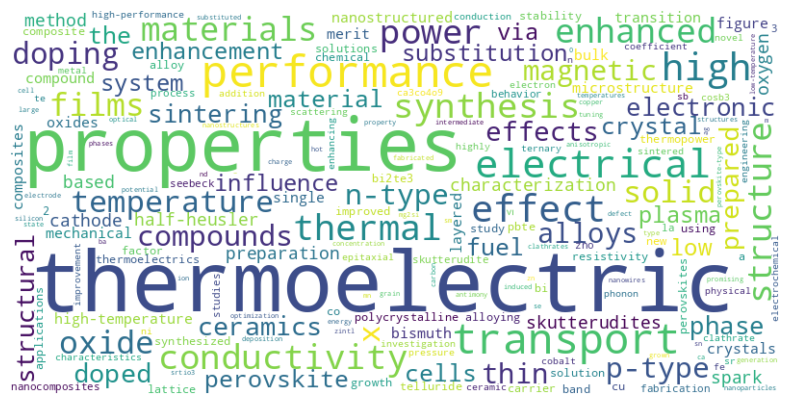

In [7]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import matplotlib.pyplot as plt


# ストップワードと句読点を定義
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# キーワードを抽出する関数
def extract_keywords(title):
    words = title.lower().split()
    words = [word.strip(string.punctuation) for word in words if word not in stop_words and word not in punctuation]
    return words

# 全タイトルからキーワードを抽出
all_keywords = []
for title in df_3['title']:
    all_keywords.extend(extract_keywords(title))

# キーワードの頻度を計算
keyword_counts = Counter(all_keywords)

# タグクラウドを生成
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

# タグクラウドを表示
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# キーワードの頻度を計算
keyword_counts = Counter(all_keywords)

# 頻度順に上位のキーワードを取得
top_keywords = keyword_counts.most_common()

# 結果を表示
print("Top Keywords:")
for word, freq in top_keywords:
    print(f"{word}: {freq}")

Top Keywords:
thermoelectric: 5668
properties: 4259
performance: 933
transport: 839
electrical: 739
high: 667
effect: 663
thermal: 608
conductivity: 579
power: 575
synthesis: 566
structure: 544
enhanced: 537
materials: 517
oxide: 494
films: 484
temperature: 452
solid: 447
x: 431
doping: 418
p-type: 389
compounds: 387
n-type: 381
alloys: 361
thin: 360
magnetic: 358
effects: 333
prepared: 321
doped: 318
ceramics: 311
sintering: 295
electronic: 290
phase: 289
structural: 287
fuel: 272
perovskite: 267
the: 258
material: 249
crystal: 243
cells: 235
enhancement: 232
system: 226
substitution: 221
low: 214
plasma: 212
via: 209
influence: 205
preparation: 205
skutterudites: 204
method: 201
oxygen: 201
spark: 197
cathode: 191
based: 190
characterization: 187
half-heusler: 184
high-temperature: 183
mechanical: 183
bulk: 183
crystals: 181
compound: 178
merit: 176
oxides: 172
single: 172
composites: 171
figure: 169
microstructure: 168
bismuth: 166
nanostructured: 157
transition: 153
layered: 151
po